***EN 2550 Assignment
 1***

*Name - Wanigarathna A.D.*

*Index No - 190660F*

1)

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

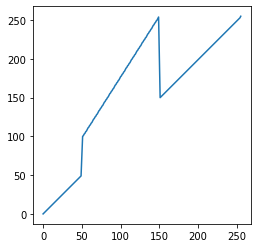

In [2]:
img = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE) 
assert img is not None
t1 = np.linspace(0,49,50)
t2 = np.array([75])
t3 = np.linspace(100,254,99)
t4 = np.array([200])
t5 = np.linspace(150,255,105)

trans = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype(np.uint8)
assert len(trans) == 256
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(trans)

new_img = cv.LUT(img, trans)
img_plt = cv.cvtColor(img, cv.COLOR_BGR2RGB )
new_img_plt = cv.cvtColor(new_img, cv.COLOR_BGR2RGB )




Original Image,

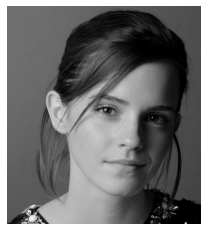

In [3]:
fig2,ax2 = plt.subplots()
plt.axis('off')
ax2.imshow(img_plt)


Transformed Image,

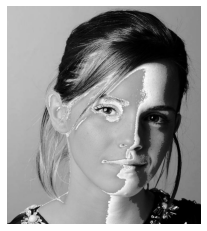

In [4]:
fig3,ax3 = plt.subplots()
plt.axis('off')
ax3.imshow(new_img_plt)

2)

a)

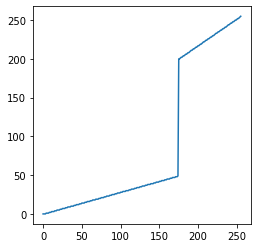

In [5]:
img = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE) 
assert img is not None
t1 = np.linspace(0,49,175)

t2 = np.linspace(200,255,81)


trans = np.concatenate((t1,t2), axis = 0).astype(np.uint8)
assert len(trans) == 256
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(trans)

new_img = cv.LUT(img, trans)
img_plt = cv.cvtColor(img, cv.COLOR_BGR2RGB )
new_img_plt = cv.cvtColor(new_img, cv.COLOR_BGR2RGB )


Original Image,

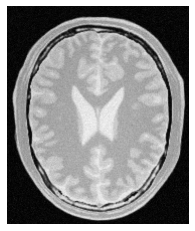

In [6]:
fig2,ax2 = plt.subplots()
plt.axis('off')
ax2.imshow(img_plt)


White matter enhanced image,

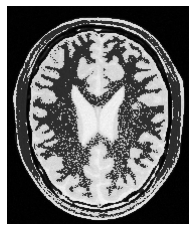

In [7]:
fig3,ax3 = plt.subplots()
plt.axis('off')
ax3.imshow(new_img_plt)

b)


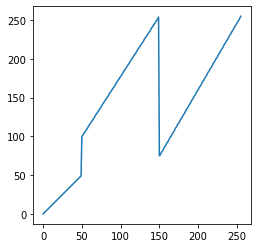

In [8]:
img = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE) 
assert img is not None
t1 = np.linspace(0,49,50)
t2 = np.linspace(100,254,100)
t3 = np.linspace(75,255,106)

trans = np.concatenate((t1,t2,t3), axis = 0).astype(np.uint8)
assert len(trans) == 256
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(trans)

new_img = cv.LUT(img, trans)
img_plt = cv.cvtColor(img, cv.COLOR_BGR2RGB )
new_img_plt = cv.cvtColor(new_img, cv.COLOR_BGR2RGB )


Original Image,

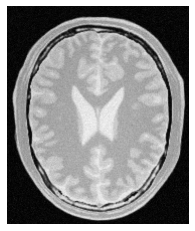

In [9]:
fig2,ax2 = plt.subplots()
plt.axis('off')
ax2.imshow(img_plt)


Gray enhanced image,

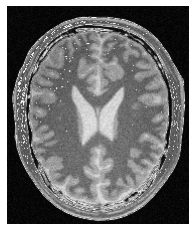

In [10]:
fig3,ax3 = plt.subplots()
plt.axis('off')
ax3.imshow(new_img_plt)

3)

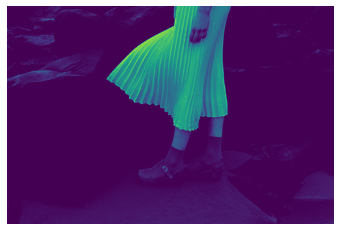

In [11]:
img = cv.imread(r'highlights_and_shadows.JPG') 
assert img is not None
img_lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
l,a,b = cv.split(img_lab)
gamma =  4
t = np.array([(p/255)**gamma*255 for p in range(256)]).astype(np.uint8)
lGamma = cv.LUT(l,t)
fig1,ax1 = plt.subplots()
plt.axis('off')

ax1.imshow(lGamma)

Upper figure depicts gamma correction to l plane with gamma = 4

Text(0.5, 1.0, 'Gamma corrected L plane of the original image')

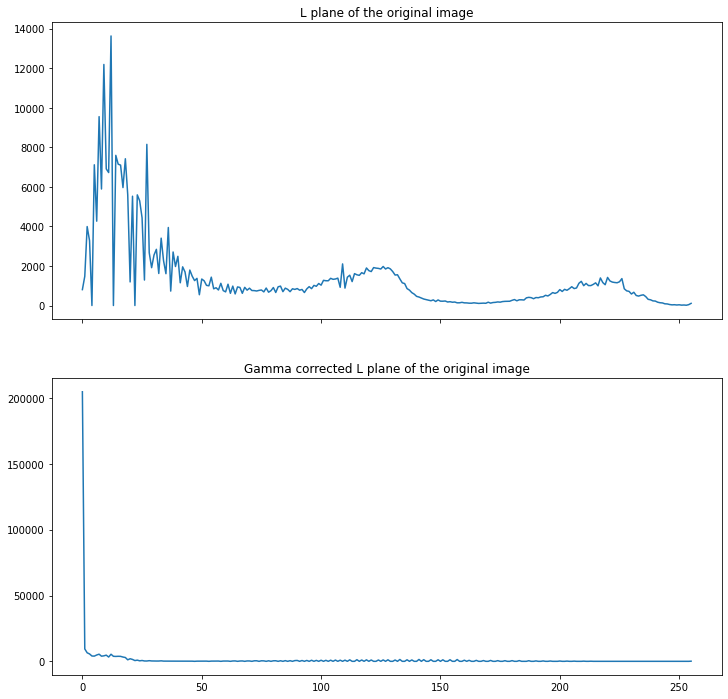

In [12]:
histL = cv.calcHist([l], [0], None, [256] , [0,256] )
histLGamma = cv.calcHist([lGamma], [0], None, [256] , [0,256] )

fig,ax = plt.subplots(2,1,sharex = True, figsize = (12,12) )
ax[0].plot(histL)
ax[0].set_title("L plane of the original image")
ax[1].plot(histLGamma)
ax[1].set_title("Gamma corrected L plane of the original image")

4)

(-0.5, 499.5, 499.5, -0.5)

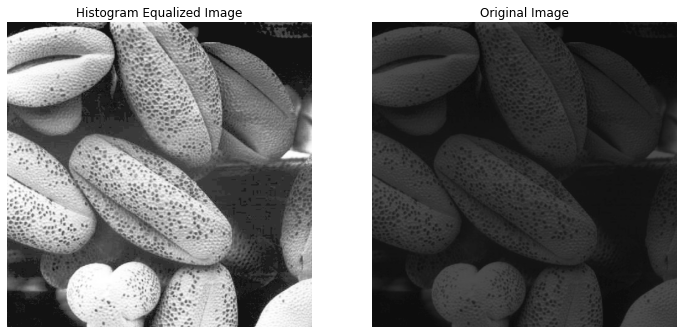

In [13]:
img = cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE) 
assert img is not None

histr = cv.calcHist([img],[0],None,[256],[0,256])
CDF = (np.cumsum(histr)/img.size)
convertedValues = np.round([CDF*255]).astype(np.uint8)
imgHistogramEqualized = cv.LUT(img,convertedValues)
imgHistogramEqualized2 = cv.cvtColor(imgHistogramEqualized,cv.COLOR_BGR2RGB)

img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)

fig1,ax1 = plt.subplots(1,2, figsize = (12,12))

ax1[0].imshow(imgHistogramEqualized2)
ax1[0].set_title("Histogram Equalized Image")
ax1[0].axis("off")


ax1[1].imshow(img2)
ax1[1].set_title("Original Image")
ax1[1].axis("off")


Text(0.5, 1.0, 'Histogram of the histogram equalized image')

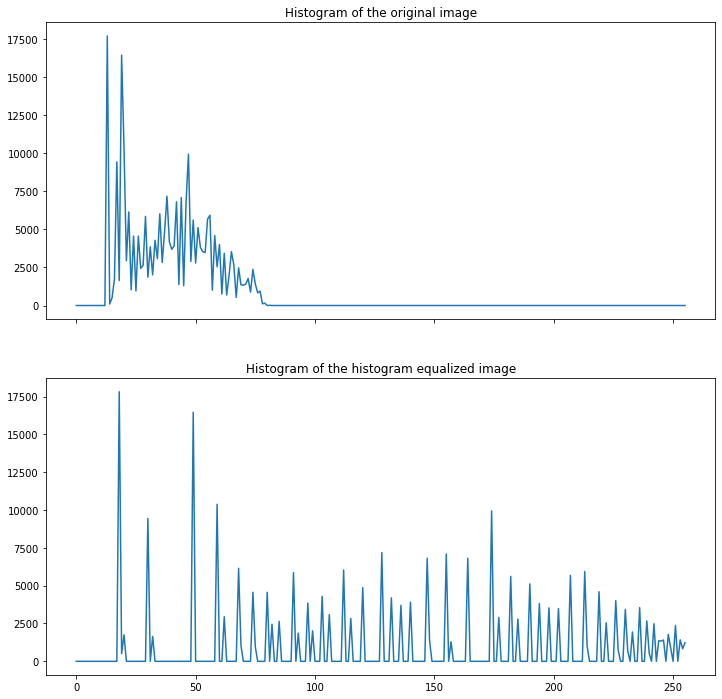

In [14]:
fig2,ax2 = plt.subplots(2,1, sharex= True, figsize = (12,12))

newHist = cv.calcHist([imgHistogramEqualized],[0],None,[256],[0,256])

ax2[0].plot(histr)
ax2[0].set_title("Histogram of the original image")
ax2[1].plot(newHist)
ax2[1].set_title("Histogram of the histogram equalized image")


5)

In [39]:
def zoomImage(img,s,mode="nearest",isCrop=True):
    rows = int(img.shape[0]*s)
    cols = int(img.shape[1]*s)
    zoomed = np.zeros((rows,cols),dtype=img.dtype)
    for i in range(rows):
        for j in range(cols):
            if mode =="bilinear":
                rowO = i/s
                colO = j/s
                c1 = colO-int(colO)
                c2 = 1-c1
                r1 = rowO-int(rowO)
                r2 = 1-r1
           
                if int(colO)+1>= img.shape[1] or int(rowO)+1>=img.shape[0]:
                    zoomed[i,j] = img[int(i/s),int(j/s)]
                else:
                    p11 =  img[int(rowO),int(colO)]
                    p12 = img[int(rowO),int(colO)+1]
                    p22 = img[int(rowO)+1,int(colO)+1]
                    p21 = img[int(rowO)+1,int(colO)]

                    zoomed[i,j] = (p11*r2+p21*r1)*c2+ (p12*r2+p22*r1)*c1
            else:
                zoomed[i,j] = img[int(i/s),int(j/s)]
    if(s>1 and isCrop):

        cropped = zoomed[0:img.shape[0],0:img.shape[1]]
    else:
        cropped = zoomed
    return cropped.astype(np.uint8)

a)

Similarity of pictures =  0.9791446231089447


Text(0.5, 1.0, 'Zoomed')

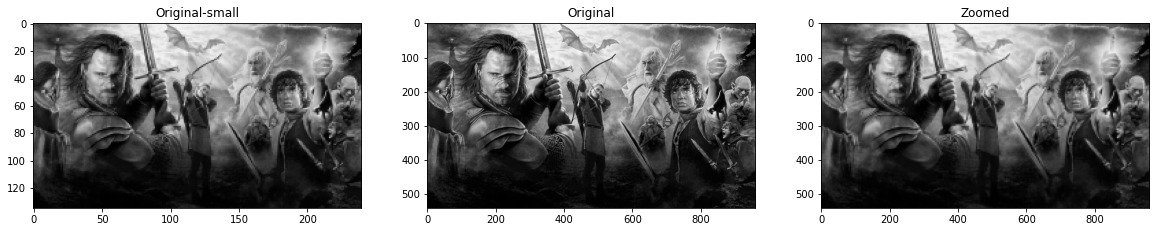

In [43]:
img = cv.imread('im01small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
original = cv.imread('im01.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)

s =4
zoomed = zoomImage(img,s,"nearest",False)
error = cv.norm( original, zoomed, cv.NORM_L2 )

similarity = 1 - error / ( original.shape[0] * original.shape[1]) 
print('Similarity of pictures = ',similarity)

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomed = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(img)
ax[0].set_title("Original-small")
ax[1].imshow(original)
ax[1].set_title("Original")
ax[2].imshow(zoomed)
ax[2].set_title("Zoomed")


Similarity of pictures =  0.9899467986013276


Text(0.5, 1.0, 'Zoomed')

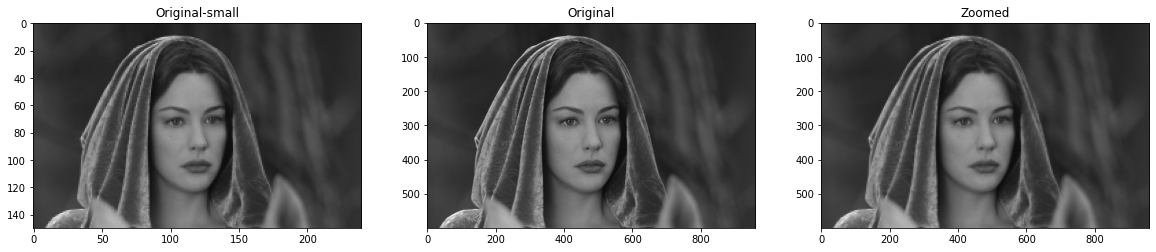

In [44]:
img = cv.imread('im02small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
original = cv.imread('im02.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)

s =4
zoomed = zoomImage(img,s,"nearest",False)
error = cv.norm( original, zoomed, cv.NORM_L2 )

similarity = 1 - error / ( original.shape[0] * original.shape[1]) 
print('Similarity of pictures = ',similarity)

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomed = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(img)
ax[0].set_title("Original-small")
ax[1].imshow(original)
ax[1].set_title("Original")
ax[2].imshow(zoomed)
ax[2].set_title("Zoomed")

Similarity of pictures =  0.9875434655067302


Text(0.5, 1.0, 'Zoomed')

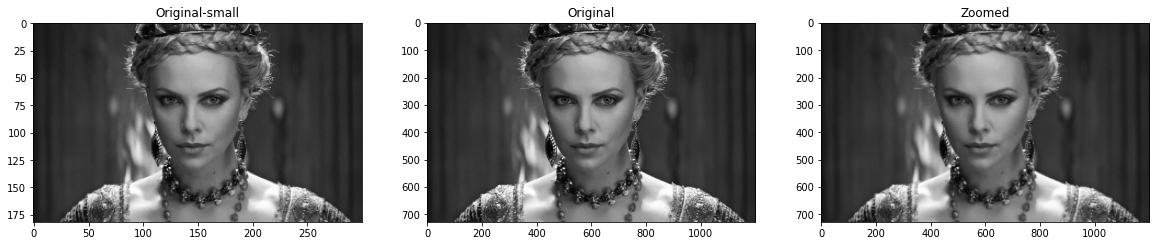

In [47]:
img = cv.imread('im03small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
original = cv.imread('im03.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)
original = original[0:728,0:1200]
s =4
zoomed = zoomImage(img,s,"nearest",False)
error = cv.norm( original, zoomed, cv.NORM_L2 )

similarity = 1 - error / ( original.shape[0] * original.shape[1]) 
print('Similarity of pictures = ',similarity)

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomed = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(img)
ax[0].set_title("Original-small")
ax[1].imshow(original)
ax[1].set_title("Original")
ax[2].imshow(zoomed)
ax[2].set_title("Zoomed")

b)

Similarity of pictures =  0.975609566680727


Text(0.5, 1.0, 'Zoomed')

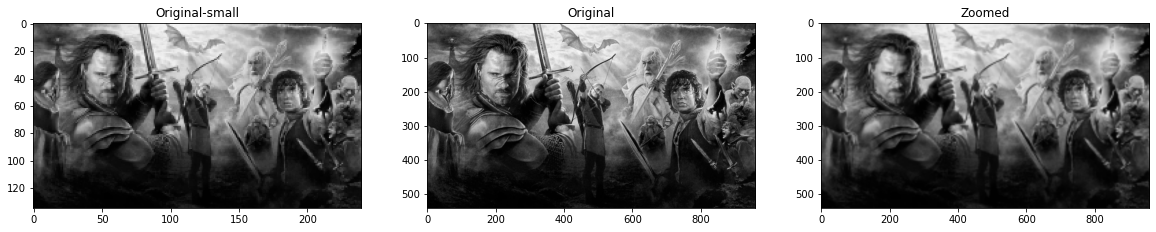

In [48]:
img = cv.imread('im01small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
original = cv.imread('im01.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)

s =4
zoomed = zoomImage(img,s,"bilinear",False)
error = cv.norm( original, zoomed, cv.NORM_L2 )

similarity = 1 - error / ( original.shape[0] * original.shape[1]) 
print('Similarity of pictures = ',similarity)

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomed = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(img)
ax[0].set_title("Original-small")
ax[1].imshow(original)
ax[1].set_title("Original")
ax[2].imshow(zoomed)
ax[2].set_title("Zoomed")


Similarity of pictures =  0.9868672354958886


Text(0.5, 1.0, 'Zoomed')

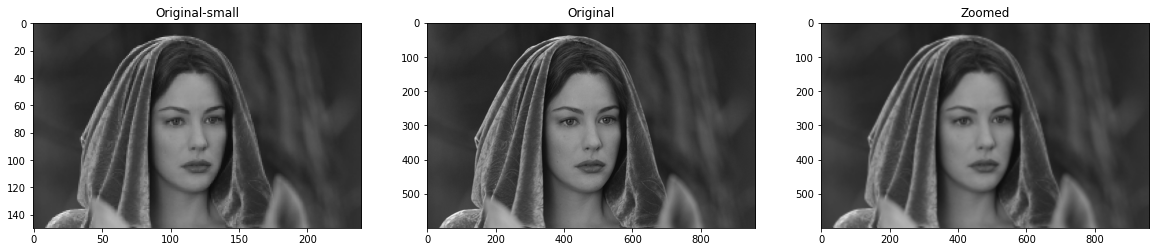

In [49]:
img = cv.imread('im02small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
original = cv.imread('im02.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)

s =4
zoomed = zoomImage(img,s,"bilinear",False)
error = cv.norm( original, zoomed, cv.NORM_L2 )

similarity = 1 - error / ( original.shape[0] * original.shape[1]) 
print('Similarity of pictures = ',similarity)

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomed = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(img)
ax[0].set_title("Original-small")
ax[1].imshow(original)
ax[1].set_title("Original")
ax[2].imshow(zoomed)
ax[2].set_title("Zoomed")

Similarity of pictures =  0.9844297836868299


Text(0.5, 1.0, 'Zoomed')

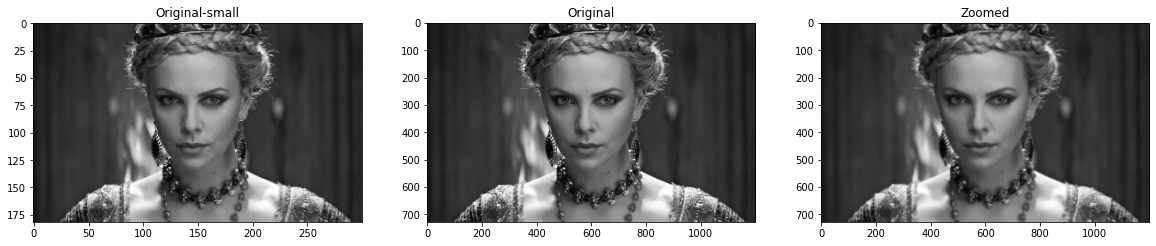

In [50]:
img = cv.imread('im03small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
original = cv.imread('im03.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)
original = original[0:728,0:1200]
s =4
zoomed = zoomImage(img,s,"bilinear",False)
error = cv.norm( original, zoomed, cv.NORM_L2 )

similarity = 1 - error / ( original.shape[0] * original.shape[1]) 
print('Similarity of pictures = ',similarity)

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
zoomed = cv.cvtColor(zoomed,cv.COLOR_BGR2RGB)
original = cv.cvtColor(original,cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(img)
ax[0].set_title("Original-small")
ax[1].imshow(original)
ax[1].set_title("Original")
ax[2].imshow(zoomed)
ax[2].set_title("Zoomed")

6)


a)

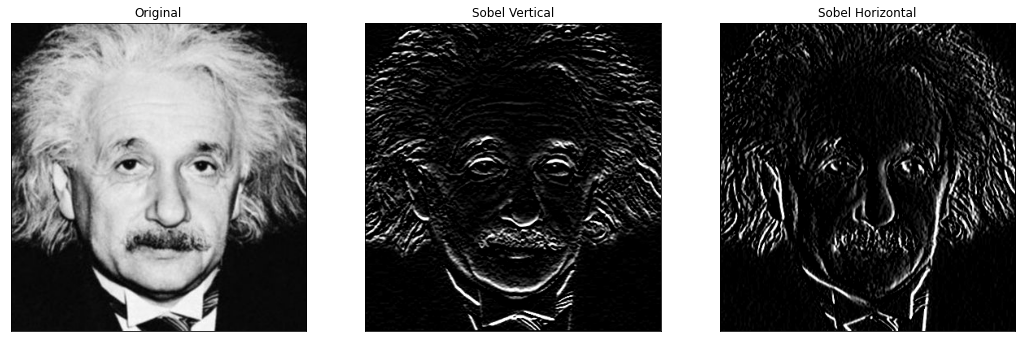

In [24]:
img = cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE) 
assert img is not None

sobal_vertical = np.array([(1,2,1),(0,0,0),(-1,-2,-1)],dtype='float') # Sobal vertical array
img_vertical =  cv.filter2D(img,-1,sobal_vertical) # Calculting horizontal edges

sobal_horizontal = np.array([(1,0,-1),(2,0,-2),(1,0,-1)],dtype='float')# Sobal hrizontal array
img_horizontal =  cv.filter2D(img,-1,sobal_horizontal)# Calculating vertical edges



fig,ax=plt.subplots(1,3,figsize=(18,10))
ax[0].imshow(img,cmap='gray')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original")
ax[1].imshow(img_vertical,cmap='gray')
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Sobel Vertical")
ax[2].imshow(img_horizontal,cmap='gray')
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Sobel Horizontal")

plt.show()

b)

In [25]:
from skimage import exposure

def sobal(image,isVertical):

	if isVertical :
		kernel = np.array([(1,2,1),(0,0,0),(-1,-2,-1)],dtype='float')
	else:
		kernel = np.array([(1,0,-1),(2,0,-2),(1,0,-1)],dtype='float')
	(Height, Width) = image.shape[:2]
	image = cv.copyMakeBorder(image, 1, 1, 1, 1,
		cv.BORDER_REPLICATE)
	output = np.zeros((Height, Width), dtype="float32")

	for y in np.arange(1, Height + 1):
		for x in np.arange(1, Width + 1):
			imgSub = image[y - 1:y + 2, x - 1:x +2]
			k = (imgSub * kernel).sum()
			output[y - 1, x - 1] = k

	output = exposure.rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")

	return output
    

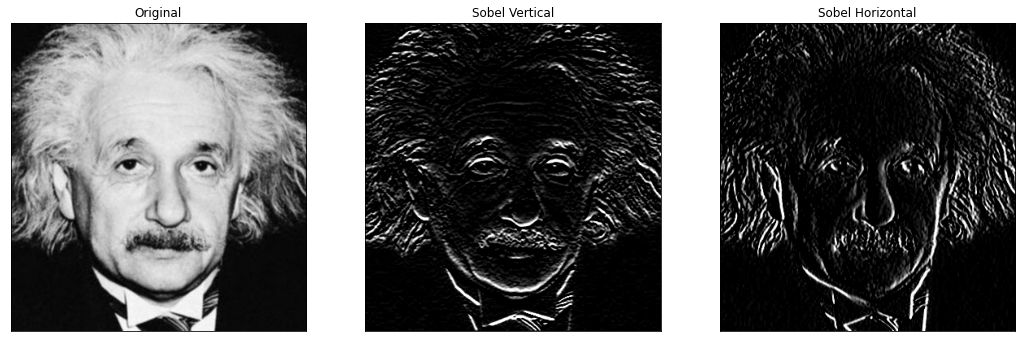

In [30]:
img = cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE) 
assert img is not None

image_vertical = sobal(img,True) 
image_horizontal = sobal (img, False)



fig,ax=plt.subplots(1,3,figsize=(18,10))
ax[0].imshow(img,cmap='gray')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original")
ax[1].imshow(image_vertical,cmap='gray')
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Sobel Vertical")
ax[2].imshow(image_horizontal,cmap='gray')
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Sobel Horizontal")

plt.show()

c)

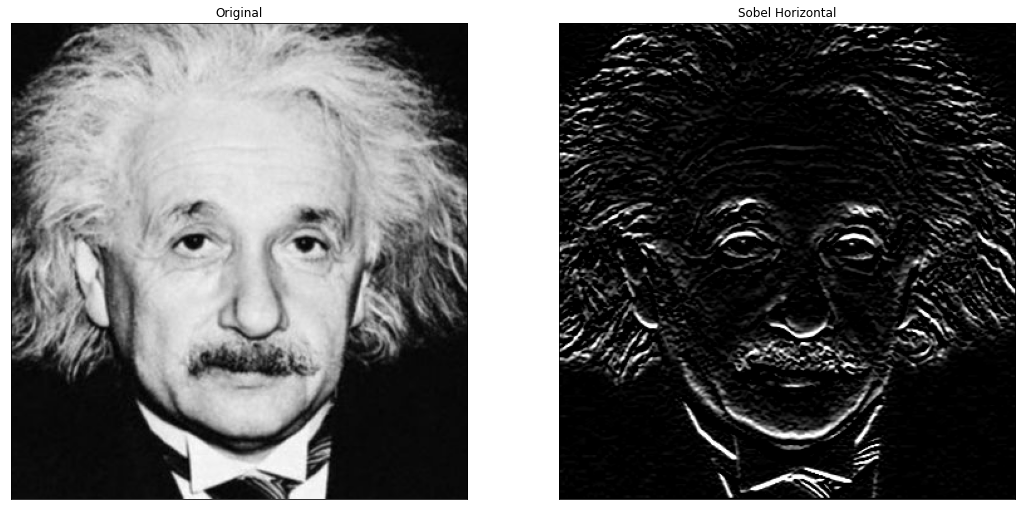

In [28]:
img = cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE) 
assert img is not None

array_1 = np.array([[1],[2],[1]], dtype=np.float32)
array_2 = np.array([[1, 0, -1]], dtype=np.float32)

sobal_horizontal = cv.sepFilter2D(img, -1, array_1, array_2)

fig,ax=plt.subplots(1,2,figsize=(18,10))
ax[0].imshow(img,cmap='gray')
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original")
ax[1].imshow(sobal_horizontal,cmap='gray')
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Sobel Horizontal")

plt.show()

7)

a)

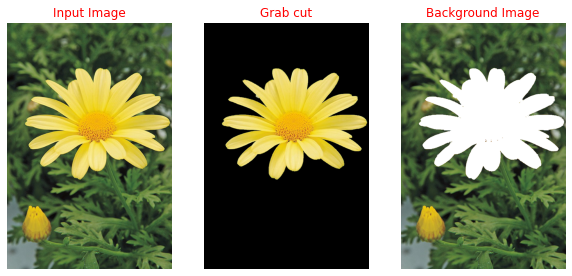

In [35]:
img = cv.imread(r"daisy.jpg", cv.IMREAD_COLOR)              
mask = np.zeros(img.shape[:2],np.uint8)                                                             

bgd_model = np.zeros((1,65),np.float64)
fgd_model = np.zeros((1,65),np.float64)
rectangle = (50,120,550,500)
cv.grabCut(img,mask,rectangle,bgd_model,fgd_model,5,cv.GC_INIT_WITH_RECT)

mask_2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = (mask_2 * 255).astype(np.uint8)
imgCut = img*mask_2[:,:,np.newaxis]


img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgCut = cv.cvtColor(imgCut, cv.COLOR_BGR2RGB)
background = cv.cvtColor(mask3, cv.COLOR_BGR2RGB)+(img - imgCut)


fig, ax = plt.subplots(1,3, figsize = (10,18))
ax[0].imshow(img)
ax[0].set_title('Input Image', color = 'r')
ax[0].axis('off')

ax[1].imshow(imgCut)
ax[1].set_title('Grab cut', color = 'r')
ax[1].axis('off')

ax[2].imshow(background)
ax[2].set_title('Background Image', color = 'r')
ax[2].axis('off')

plt.show()


b)

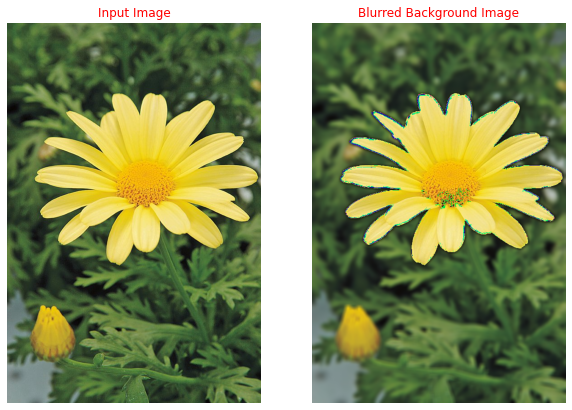

In [37]:
img = cv.imread(r"daisy.jpg", cv.IMREAD_COLOR)             
mask = np.zeros(img.shape[:2],np.uint8)                                                               


bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,120,550,500) 
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = (mask2 * 255).astype(np.uint8)
imgCut = img*mask2[:,:,np.newaxis]

background = cv.cvtColor(mask3, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgCut = cv.cvtColor(imgCut, cv.COLOR_BGR2RGB)
blurred = cv.blur(img-imgCut, (10,10))
blurredBackground = imgCut + blurred

fig, ax = plt.subplots(1,2, sharex = 'all', sharey = 'all', figsize = (10,10))
ax[0].imshow(img)
ax[0].set_title('Input Image', color = 'r')
ax[0].axis('off')

ax[1].imshow(blurredBackground)
ax[1].set_title('Blurred Background Image', color = 'r')
ax[1].axis('off')
plt.show()